# Imports 

In [129]:
import pandas as pd
import numpy as np

In [131]:
data = pd.read_csv(r"C:\Users\user\Downloads\titanic.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [143]:
data = data.dropna()

In [145]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [147]:
data_cleaned = data.drop(['PassengerId', 'Name', 'SibSp',	'Parch',	'Ticket', "Cabin", "Embarked"], axis=1)
data_cleaned

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,12.0,23.4500
889,1,1,male,26.0,30.0000


In [149]:
Inputs = data_cleaned.drop('Survived', axis = "columns")
Inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,12.0,23.4500
889,1,male,26.0,30.0000


In [151]:
Target = data_cleaned["Survived"]

In [153]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [155]:
P_encoder = LabelEncoder()
S_encoder = LabelEncoder()

In [157]:
Inputs["Sex_1"] = S_encoder.fit_transform(Inputs["Sex"])
Inputs["Pclass_1"] = P_encoder.fit_transform(Inputs["Pclass"])

In [159]:
Inputs.head()

,Pclass,Sex,Age,Fare,Sex_1,Pclass_1
0,3,male,22.0,7.2500,1,2
1,1,female,38.0,71.2833,0,0
2,3,female,26.0,7.9250,0,2
3,1,female,35.0,53.1000,0,0
4,3,male,35.0,8.0500,1,2


In [161]:
Inputs_n = Inputs.drop(["Sex", "Pclass"], axis=1)
Inputs_n

,Age,Fare,Sex_1,Pclass_1
0,22.0,7.2500,1,2
1,38.0,71.2833,0,0
2,26.0,7.9250,0,2
3,35.0,53.1000,0,0
4,35.0,8.0500,1,2
...,...,...,...,...
886,27.0,13.0000,1,1
887,19.0,30.0000,0,0
888,12.0,23.4500,0,2
889,26.0,30.0000,1,0


In [163]:
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [165]:
model = tree.DecisionTreeClassifier()

In [167]:
model.fit(Inputs_n, Target)

DecisionTreeClassifier()

In [169]:
model.score(Inputs_n, Target)

0.9797979797979798

In [171]:
def predict_passenger(pclass, sex, age, fare):
    df = pd.DataFrame([[pclass, sex, age, fare]],
                      columns=Inputs_n.columns)
    return model.predict(df)[0]


In [175]:
predict_passenger(35.0,8.0500,1,2)

0

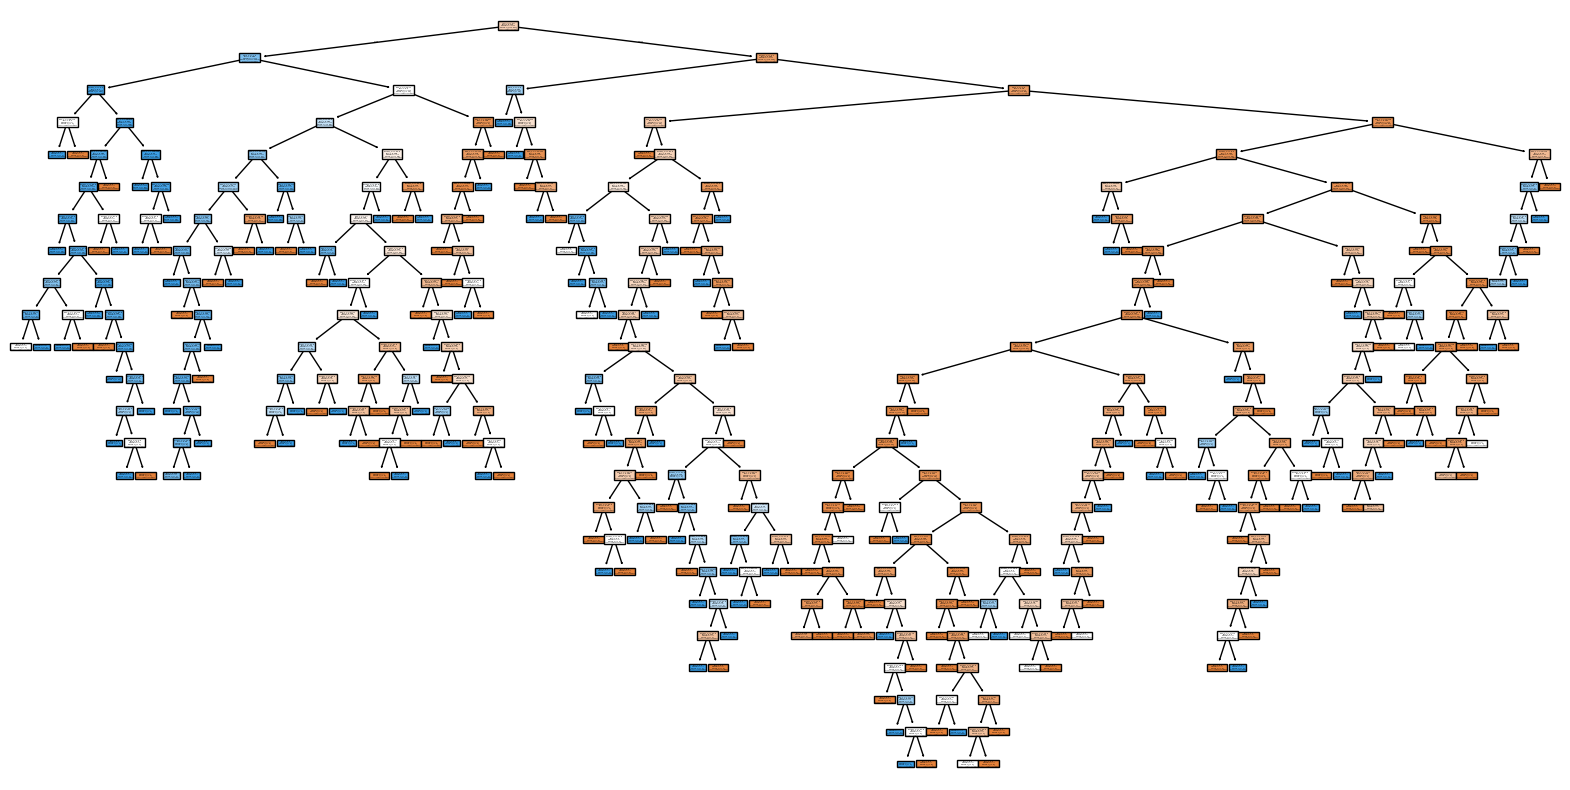

In [187]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names =["Pclass_1", "Sex_1", "Age_1", "Fare_1"], 
          class_names=["Not Survived", "Survived"], filled=True)
plt.show()

In [179]:
from sklearn.tree import export_text

tree_rules = export_text(model, feature_names=["Pclass_1", "Sex_1", "Age_1", "Fare_1"])
print(tree_rules)

|--- Age_1 <= 0.50
|   |--- Fare_1 <= 1.50
|   |   |--- Pclass_1 <= 2.50
|   |   |   |--- Sex_1 <= 88.78
|   |   |   |   |--- class: 1
|   |   |   |--- Sex_1 >  88.78
|   |   |   |   |--- class: 0
|   |   |--- Pclass_1 >  2.50
|   |   |   |--- Sex_1 <= 28.86
|   |   |   |   |--- Sex_1 <= 28.23
|   |   |   |   |   |--- Pclass_1 <= 56.00
|   |   |   |   |   |   |--- Pclass_1 <= 23.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Pclass_1 >  23.50
|   |   |   |   |   |   |   |--- Pclass_1 <= 27.50
|   |   |   |   |   |   |   |   |--- Pclass_1 <= 25.50
|   |   |   |   |   |   |   |   |   |--- Sex_1 <= 13.75
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Sex_1 >  13.75
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Pclass_1 >  25.50
|   |   |   |   |   |   |   |   |   |--- Sex_1 <= 17.43
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |  